# Naive bayes

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL_underover_Normalized-dataset.csv",sep='\t',decimal=",",index_col=0)

In [16]:
df.head()

,Imax,E,PIL,Mt,TsW,NbxW,MeanD,Eday_of_week,class
0,0.019796,0.520590,0.167672,0.000820,0.004367,0.019704,0.187397,0.738108,0
1,0.001459,0.289906,0.167672,0.000713,0.000436,0.000000,0.000000,0.000000,0
2,0.005001,0.383625,0.167672,0.000607,0.000811,0.000000,0.000000,0.000000,0
3,0.005001,0.611036,0.167672,0.000757,0.007482,0.044335,0.192329,0.689678,0
4,0.003959,0.413622,0.167672,0.000902,0.001998,0.014778,0.258904,0.758789,0


In [17]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.20)

## Modello

In [18]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
test_pred_gnb = gnb.predict(test_set)

In [19]:
print(classification_report(test_label, test_pred_gnb))

              precision    recall  f1-score   support

           0       0.47      0.86      0.60       507
           1       0.37      0.33      0.35       507
           2       0.78      0.20      0.32       507

    accuracy                           0.46      1521
   macro avg       0.54      0.46      0.42      1521
weighted avg       0.54      0.46      0.42      1521



## Visualizzazioni
Per discutere meglio sul metodo si visualizza uno scatterplot con 2 attributi e si vede se ci sono pattern evidenti

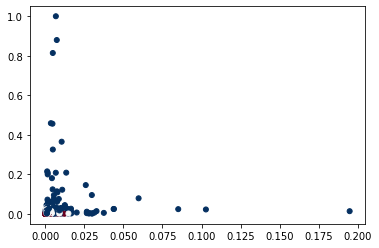

In [20]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 4].values, c=test_label.values, s=25, cmap='RdBu');

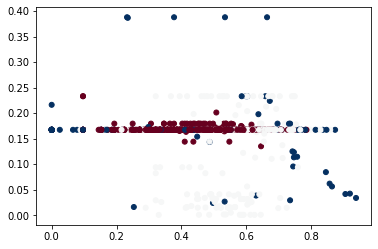

In [21]:
plt.scatter(test_set.iloc[:, 1].values, test_set.iloc[:, 2].values, c=test_pred_gnb, s=25, cmap='RdBu');